<a href="https://colab.research.google.com/github/SamMilnes/Data-Science-Individual-Final-Project/blob/main/Data_Science_Individual_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras.utils.vis_utils import plot_model
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
golf_data = pd.read_csv('/content/gdrive/MyDrive/Data Science Individual Project/golf_data_forDSFinalProject.csv', encoding= 'unicode_escape')
golf_data

,Unnamed: 0,year,player_name,ranking,top_10,wins,score_average,rounds,bounce_back,driving_accuracy,...,go_for_green,sand_save,prox_arg,putt_25,putt15_25,putt10_15,putt_10,finround_sa,masters_finish,total_score
0,1,2007,Aaron Baddeley,29,3,1,70.332,29.0,20.25,62.67,...,19.05,57.89,"6' 10""",7.95,16.90,26.87,87.25,69.67,T52,307
1,2,2008,Aaron Baddeley,43,1,0,70.837,27.0,26.56,58.53,...,20.00,43.59,"8' 11""",6.90,19.28,33.82,88.59,69.80,CUT,148
2,3,2009,Aaron Baddeley,120,0,0,71.129,20.0,15.63,44.36,...,18.18,49.09,"8' 2""",7.94,18.03,28.57,88.62,71.50,T17,284
3,4,2011,Aaron Baddeley,22,3,1,70.032,32.0,27.50,54.65,...,24.29,53.97,"6' 8""",5.04,20.41,30.99,88.43,70.29,T47,293
4,5,2012,Aaron Baddeley,T38,1,0,70.921,27.0,26.09,54.50,...,27.59,71.05,"7' 1""",3.00,14.49,39.06,89.00,69.67,T40,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,1580,2017,Zach Johnson,T50,2,0,70.432,29.0,17.54,67.43,...,24.32,64.44,"6' 11""",6.06,26.58,29.31,89.64,72.00,CUT,151
1580,1581,2018,Zach Johnson,20,1,0,69.848,35.0,23.08,63.74,...,23.81,52.94,"7' 4""",6.06,13.54,28.17,88.99,69.25,T36,290
1581,1582,2019,Zach Johnson,81,1,0,70.670,30.0,23.38,63.70,...,16.67,53.49,"6' 8""",10.10,12.66,33.85,87.09,70.33,T58,293
1582,1583,2021,Zach Johnson,69,3,0,70.310,50.0,22.13,61.64,...,28.05,58.97,"8' 3""",6.70,23.43,32.46,89.05,70.92,CUT,151


In [3]:
df = golf_data.copy()
df.drop(df.columns[0], axis=1, inplace=True)
df = df.dropna()
df

,year,player_name,ranking,top_10,wins,score_average,rounds,bounce_back,driving_accuracy,driving_distance,...,go_for_green,sand_save,prox_arg,putt_25,putt15_25,putt10_15,putt_10,finround_sa,masters_finish,total_score
0,2007,Aaron Baddeley,29,3,1,70.332,29.0,20.25,62.67,283.2,...,19.05,57.89,"6' 10""",7.95,16.90,26.87,87.25,69.67,T52,307
1,2008,Aaron Baddeley,43,1,0,70.837,27.0,26.56,58.53,282.9,...,20.00,43.59,"8' 11""",6.90,19.28,33.82,88.59,69.80,CUT,148
2,2009,Aaron Baddeley,120,0,0,71.129,20.0,15.63,44.36,280.9,...,18.18,49.09,"8' 2""",7.94,18.03,28.57,88.62,71.50,T17,284
3,2011,Aaron Baddeley,22,3,1,70.032,32.0,27.50,54.65,294.9,...,24.29,53.97,"6' 8""",5.04,20.41,30.99,88.43,70.29,T47,293
4,2012,Aaron Baddeley,T38,1,0,70.921,27.0,26.09,54.50,289.0,...,27.59,71.05,"7' 1""",3.00,14.49,39.06,89.00,69.67,T40,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,2016,Zach Johnson,36,3,0,70.945,32.0,15.38,64.65,284.4,...,25.58,53.70,"7' 3""",8.26,20.93,32.05,88.69,70.20,CUT,152
1579,2017,Zach Johnson,T50,2,0,70.432,29.0,17.54,67.43,286.7,...,24.32,64.44,"6' 11""",6.06,26.58,29.31,89.64,72.00,CUT,151
1580,2018,Zach Johnson,20,1,0,69.848,35.0,23.08,63.74,291.5,...,23.81,52.94,"7' 4""",6.06,13.54,28.17,88.99,69.25,T36,290
1581,2019,Zach Johnson,81,1,0,70.670,30.0,23.38,63.70,284.1,...,16.67,53.49,"6' 8""",10.10,12.66,33.85,87.09,70.33,T58,293


In [4]:
def clean_prox_arg_column(row):
  new = row['prox_arg'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_arg_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_arg_final

def clean_prox_fair_column(row):
  new = row['prox_fair'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_fair_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_fair_final

def clean_prox_rough_column(row):
  new = row['prox_rough'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_rough_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_rough_final

def clean_masters_finish_column(row):
  if "T" in row["masters_finish"]:
    return row['masters_finish'].replace("T", "")
  
def clean_masters_ranking_column(row):
  if "T" in row["ranking"]:
    return row['ranking'].replace("T", "")
  else:
    return row['ranking']

In [5]:

df['prox_arg_clean'] = df.apply(clean_prox_arg_column, axis=1)
df['prox_fair_clean'] = df.apply(clean_prox_fair_column, axis=1)
df['prox_rough_clean'] = df.apply(clean_prox_rough_column, axis=1)

df['masters_finish_clean'] = df.apply(clean_masters_finish_column, axis=1)
df['ranking_clean'] = df.apply(clean_masters_ranking_column, axis=1)

# df

# df = df[df['masters_finish_clean'] != "CU"]
# df = df[df['masters_finish_clean'] != "WD"]

df = df[df['ranking_clean'] != "CU"]
df = df[df['ranking_clean'] != "WD"]

df = df.dropna()

df = df.drop(columns=['prox_arg', 'prox_fair', 'prox_rough', 'masters_finish', 'ranking', 'hole_proximity', 'x_of_attempts', 'masters_finish_clean'])

# df['masters_finish_clean'] = df['masters_finish_clean'].astype('int')
df['ranking_clean'] = df['ranking_clean'].astype('int')

# This is the dataset we want to predict the total score for

In [6]:
# df_2021 = df[df['year'] == 2021]
# len(df_2021)
# df_2021

# This is the dataset we want to train our model on

In [7]:
# df_train = df[df['year'] != 2021]
df_train = df.drop(columns=['year', 'player_name'])
df_train

,top_10,wins,score_average,rounds,bounce_back,driving_accuracy,driving_distance,gir,putts_round,scramble,...,putt_25,putt15_25,putt10_15,putt_10,finround_sa,total_score,prox_arg_clean,prox_fair_clean,prox_rough_clean,ranking_clean
0,3,1,70.332,29.0,20.25,62.67,283.2,60.68,28.04,61.41,...,7.95,16.90,26.87,87.25,69.67,307,82,47,58,29
1,1,0,70.837,27.0,26.56,58.53,282.9,65.74,28.21,54.05,...,6.90,19.28,33.82,88.59,69.80,148,107,42,49,43
2,0,0,71.129,20.0,15.63,44.36,280.9,54.09,27.68,61.78,...,7.94,18.03,28.57,88.62,71.50,284,98,39,48,120
3,3,1,70.032,32.0,27.50,54.65,294.9,70.00,28.67,61.11,...,5.04,20.41,30.99,88.43,70.29,293,80,42,49,22
4,1,0,70.921,27.0,26.09,54.50,289.0,64.96,28.23,62.20,...,3.00,14.49,39.06,89.00,69.67,293,85,40,59,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,3,0,70.945,32.0,15.38,64.65,284.4,70.83,29.04,61.22,...,8.26,20.93,32.05,88.69,70.20,152,87,26,53,36
1579,2,0,70.432,29.0,17.54,67.43,286.7,64.44,28.28,66.88,...,6.06,26.58,29.31,89.64,72.00,151,83,45,38,50
1580,1,0,69.848,35.0,23.08,63.74,291.5,69.27,28.44,66.10,...,6.06,13.54,28.17,88.99,69.25,290,88,37,53,20
1581,1,0,70.670,30.0,23.38,63.70,284.1,65.19,28.37,64.89,...,10.10,12.66,33.85,87.09,70.33,293,80,40,51,81


# Exploratory Data Analysis

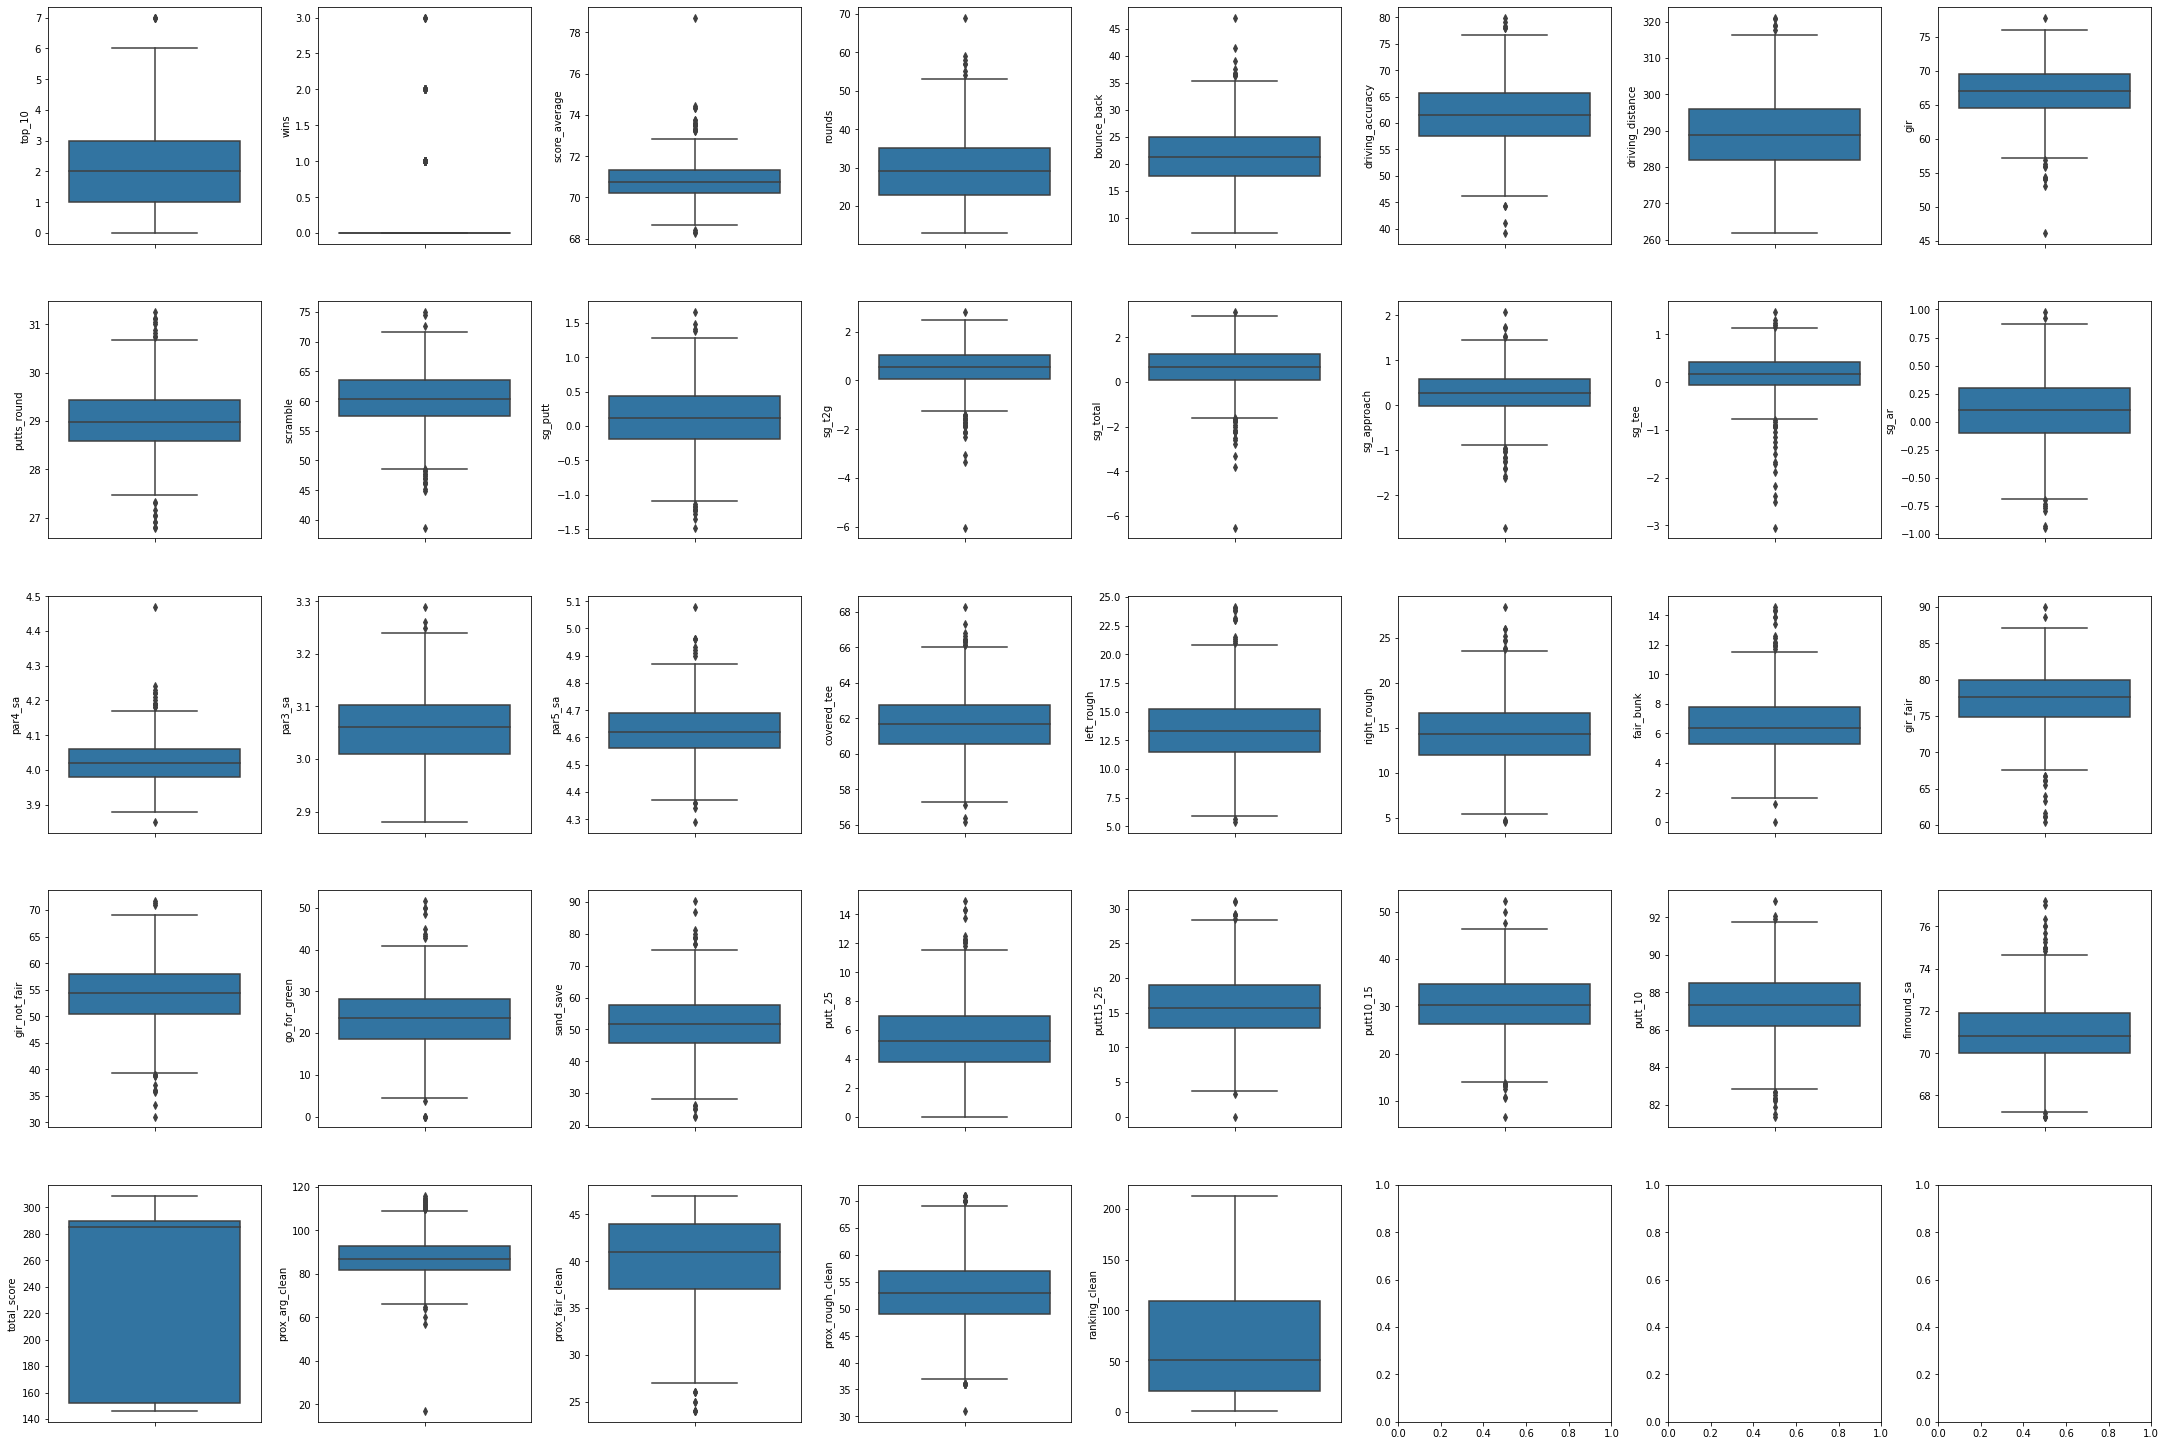

In [8]:
fig, axs = plt.subplots(ncols=8, nrows = 5, figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
  # print(k)
  sns.boxplot(y=k, data=df_train, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

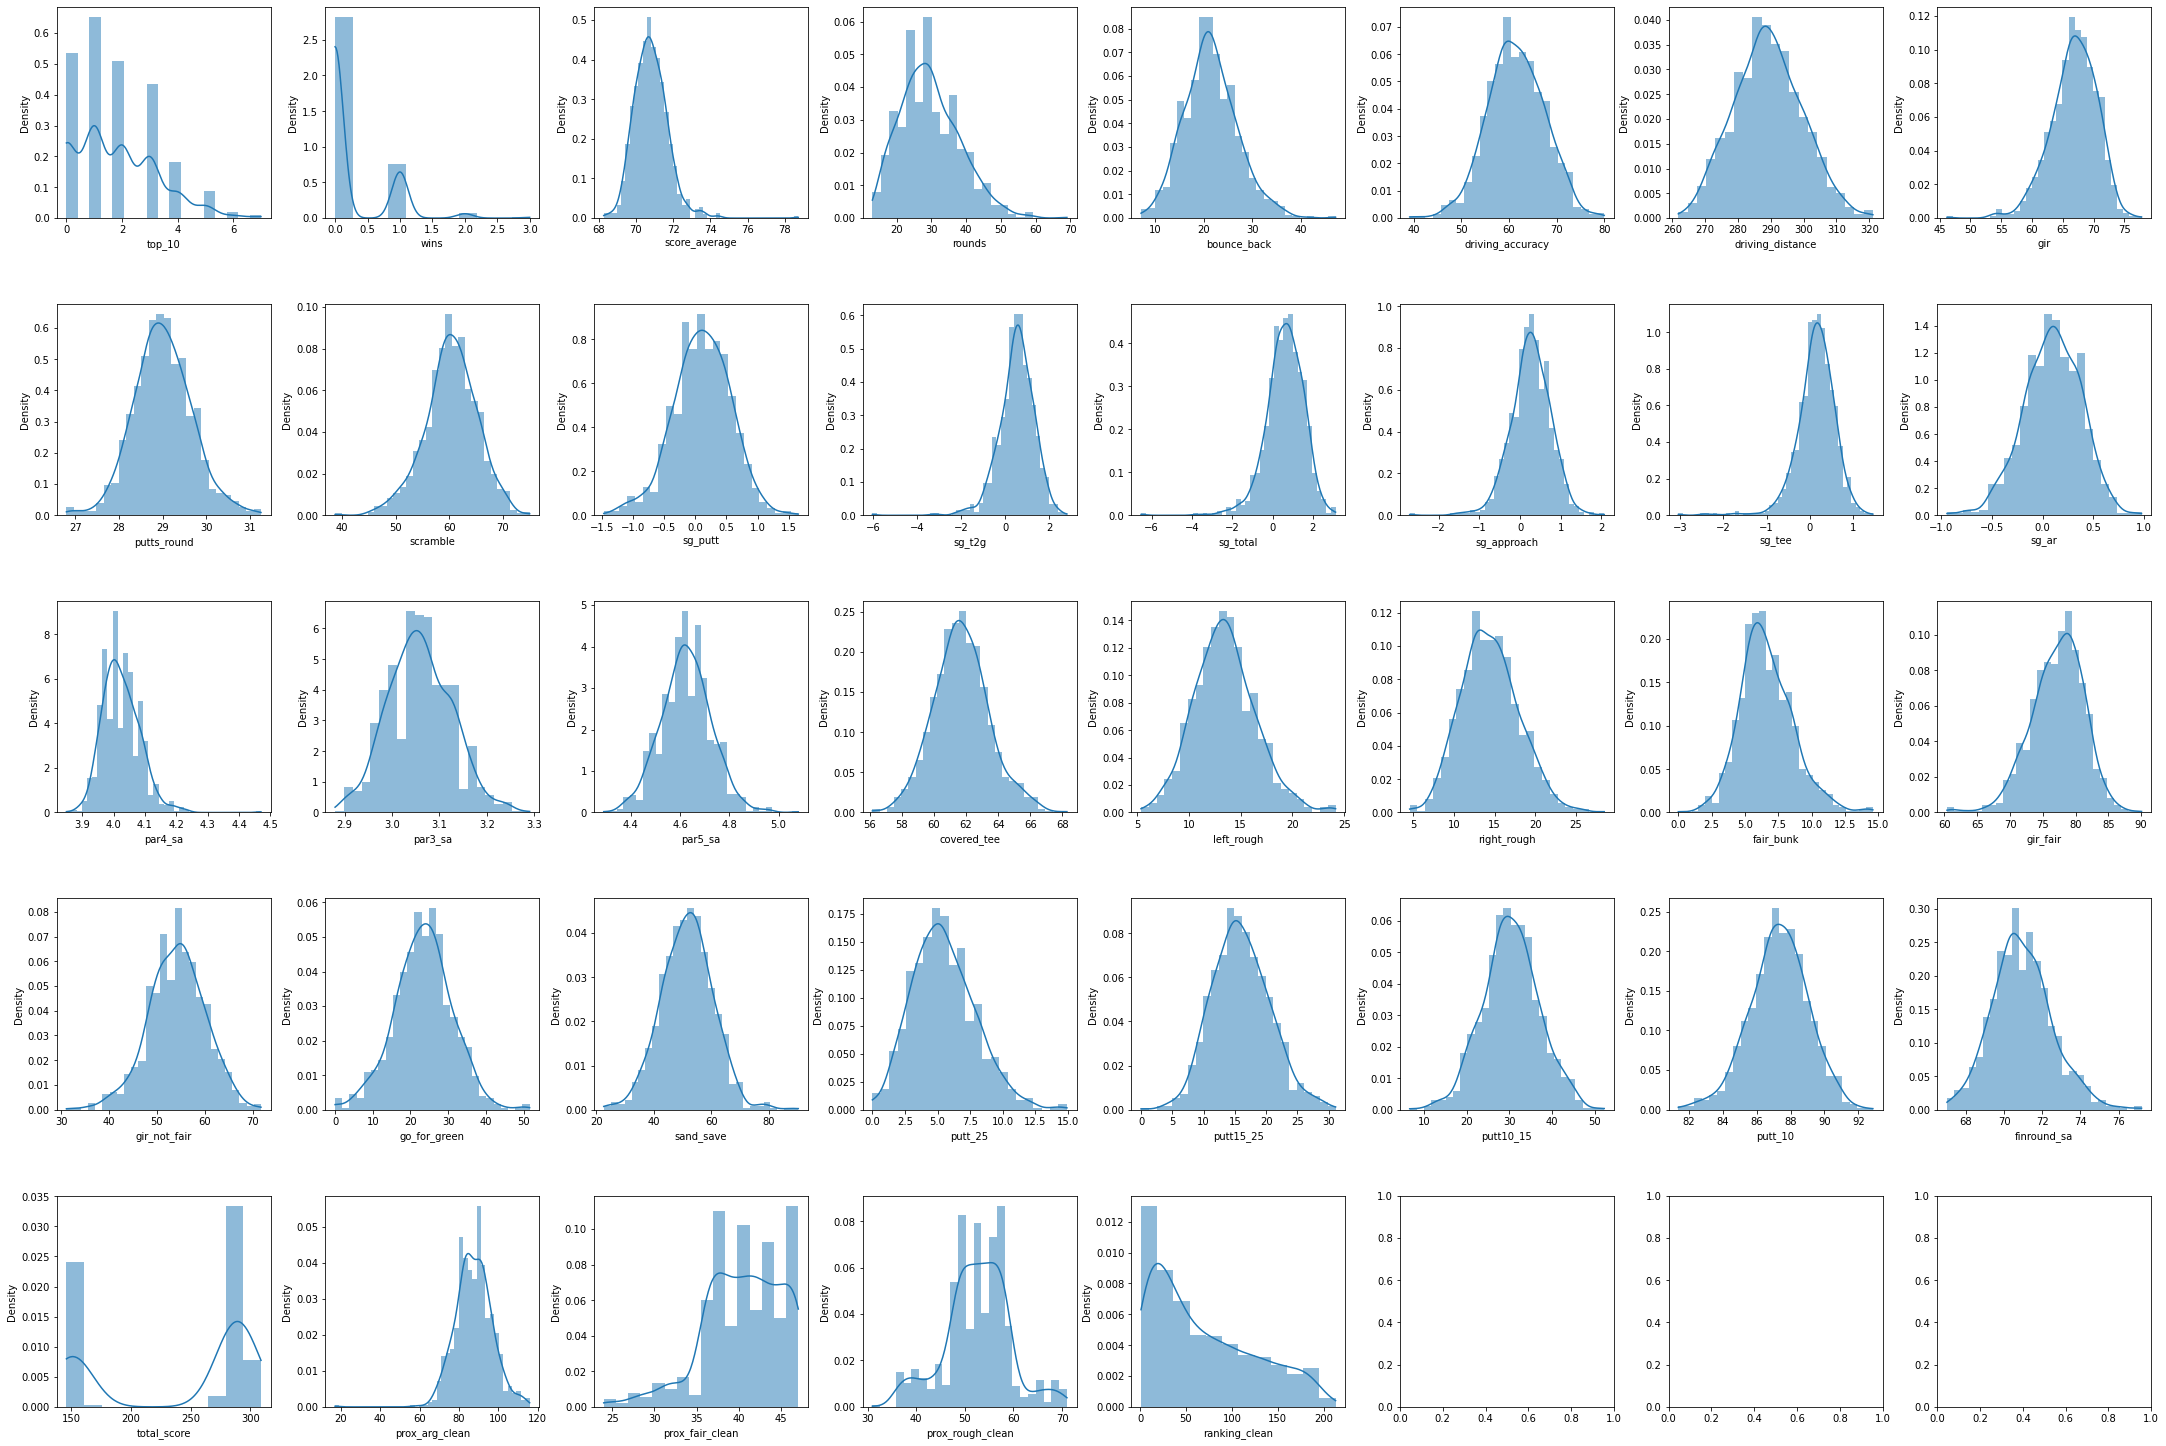

In [9]:
fig, axs = plt.subplots(ncols=8, nrows = 5, figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
  sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
for k,v in df_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5*iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_train)[0]
  print("%s Outliers = %.2f%%" % (k, perc))

top_10 Outliers = 1.20%
wins Outliers = 100.00%
score_average Outliers = 2.18%
rounds Outliers = 0.87%
bounce_back Outliers = 1.09%
driving_accuracy Outliers = 0.98%
driving_distance Outliers = 0.55%
gir Outliers = 1.31%
putts_round Outliers = 1.97%
scramble Outliers = 1.86%
sg_putt Outliers = 1.42%
sg_t2g Outliers = 2.29%
sg_total Outliers = 2.07%
sg_approach Outliers = 1.97%
sg_tee Outliers = 2.73%
sg_ar Outliers = 0.98%
par4_sa Outliers = 1.86%
par3_sa Outliers = 0.33%
par5_sa Outliers = 1.31%
covered_tee Outliers = 1.64%
left_rough Outliers = 1.42%
right_rough Outliers = 1.20%
fair_bunk Outliers = 1.75%
gir_fair Outliers = 1.42%
gir_not_fair Outliers = 1.53%
go_for_green Outliers = 1.64%
sand_save Outliers = 1.64%
putt_25 Outliers = 1.20%
putt15_25 Outliers = 0.98%
putt10_15 Outliers = 1.42%
putt_10 Outliers = 1.42%
finround_sa Outliers = 1.97%
total_score Outliers = 0.00%
prox_arg_clean Outliers = 2.51%
prox_fair_clean Outliers = 0.98%
prox_rough_clean Outliers = 4.26%
ranking_cle

[0.02410777 0.01423868 0.02665592 0.02741257 0.02984388 0.02671554
 0.02820407 0.02887856 0.02839598 0.02762463 0.02798417 0.02803707
 0.02754976 0.02790946 0.02739092 0.02790964 0.02776842 0.02873997
 0.02864541 0.02762808 0.0285774  0.02899975 0.02819928 0.02871742
 0.0272452  0.029562   0.02762753 0.02872556 0.02977971 0.02887059
 0.02891862 0.02850851 0.02889129 0.02836613 0.02931524 0.02805526]


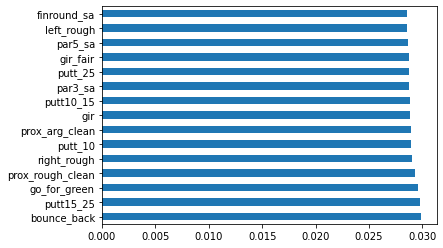

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

x_feat = df_train.drop("total_score", axis=1) # Features
y_feat = df_train["total_score"] # Label

# import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_feat,y_feat)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_feat.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()



In [12]:
# ct = make_column_transformer(
#     (MinMaxScaler(), ["driving_accuracy",	"driving_distance",	"gir",	"putts_round",	"scramble", "sg_putt", "sg_t2g", "sg_total", "sg_approach", "sg_tee", "sg_ar",
#                       "par4_sa", "par3_sa", "par5_sa", "covered_tee", "left_rough", "right_rough", "fair_bunk", "gir_fair", "gir_not_fair", "go_for_green", "sand_save", "putt_25",
#                       "putt15_25", "putt10_15", "putt_10", "finround_sa", "prox_arg_clean", "prox_fair_clean", "prox_rough_clean", "prox_rough_clean", "ranking_clean"])
# )
ct = make_column_transformer(
    (MinMaxScaler(), ["prox_fair_clean", "par5_sa", "covered_tee", "gir", "go_for_green", "fair_bunk", "sand_save", "bounce_back", "putt_25", "ranking_clean", "putt15_25", "prox_arg_clean", "sg_approach"])
)

In [13]:
X = df_train.drop("total_score", axis=1) # Features
y = df_train["total_score"] # Label

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [15]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [16]:
tf.random.set_seed(11)
golf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

golf_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mae"])
fit_data = golf_model.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [17]:
golf_model_loss, golf_model_mae = golf_model.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 53.9342 - mae: 53.9342


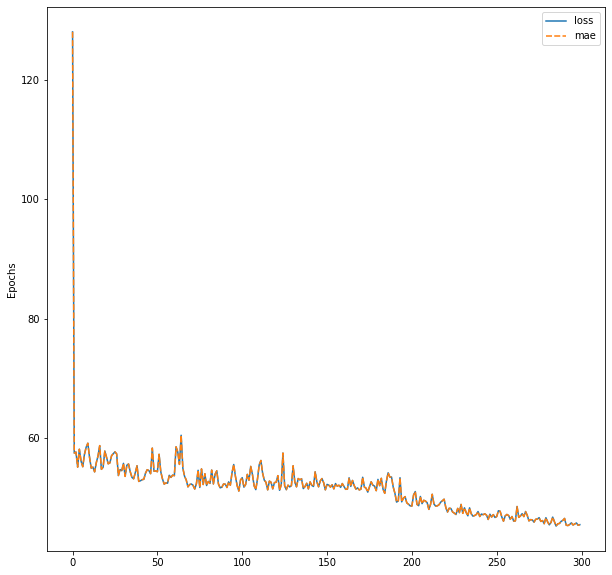

In [18]:
plt.figure(figsize=(10,10))
plt.ylabel("Loss")
plt.ylabel("Epochs")
sns.lineplot(data=fit_data.history)

In [20]:
predictions = golf_model.predict(X_test_normal).flatten()
results = pd.DataFrame(data={'Test Predictions': predictions, 'Actuals':y_test})
results

6/6 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
1504,282.723816,158
1276,283.652924,153
681,282.947418,149
1482,282.917328,277
786,282.457764,292
...,...,...
350,181.908966,297
1450,282.504333,302
1193,282.064880,288
480,282.628632,289
